# API EDA
- API Link:https://site.financialmodelingprep.com/
- API Documentation: https://site.financialmodelingprep.com/developer/docs

## ¡Cosas que tener en cuenta sobre el proceso que se realizo en este notebook!
- Este EDA se trabajo con un csv que se obtiene al final de todo el proceso de extraccion, esto con el fin de que el proceso de extraccion de mas de 50000 consultas no tuviera que repetirse cada vez que se trabajara con este notebook. claro que aqui encontraras el proceso completo de extraccion como resultado de un dataframe.
- El prcoeso realizado fue primero una consulta a la API financialmodelng en la cual obtuvimos un dataset con 6 campos con informacion muy general, por eso decidimos complementar este dataset con informacion de Yahoo Finance pudiendo obtener informacion de alto valor con la cual complementar el dataset que obtuvimos dela extraccion de datos de la API, la cual era muy limitada, este proceso añadido le agrego alto valor al dataset con nuevos campos y monton de registros.
- Recordemos que este proceso de extraccion de datos gracias a una API se hace con el fin de agregar valor a nuestro aprendizaje que obtuvimos analizando nuestro primero dataset de despidos tecnologicos, por eso decidimos abordar informacion relacionada con el mercado financiero de las empresas y sus sectores.


## Importacion de bibliotecas
- Requests: Esta biblioteca nos facilita todo el trabajo de envio de solicitudes de informacion a las APIs, pudiendo asi    acceder a la informacion de este dataset.
- Pandas, Matplotlib y Numpy: Estas bibliotecas nos ayudaran en todo el proceso de analisis y limpieza produnda de nuestros datos.
- Yfinance: Esta bilbioteca nos ayuda a poder acceder a datos financieros de vital importancia de una manera sencilla y rapida, sin tener tantas limitaciones que las APIs llegan a tener para sus consultas.

In [1]:
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Proceso inicial de extraccion API
- El codigo realiza una consulta a los campos que como primera capa la API nos permite solicitar sin ninguna limitacion en el numero de consultas obteniendo asi una lista general de acciones disponibles para cada empresa la cual la API tenga registro
- Como segundo paso el codigo buscara complementar el dataset obtenido con campos que la misma API nos ofrece pero de manera limitada por consulta, por eso es que usamos la biblioteca de yfinance como herramienta podemora de analistas financieros


In [2]:
# Paso 1: Obtener la lista de acciones disponibles
api_url = "https://financialmodelingprep.com/api/v3/available-traded/list?apikey=7lZIU82kV1JVXJZP2zHFFlJLvdvsswj0"
response = requests.get(api_url)

if response.status_code == 200:
    stock_data = response.json()
    df = pd.DataFrame(stock_data)
    df = df[['symbol', 'name', 'price', 'exchange', 'exchangeShortName']]
else:
    print("Error en la solicitud:", response.status_code)
    raise Exception("No se pudo obtener los datos de la API.")

# Definir la función para obtener información financiera
def get_financial_info(symbol, index, total):
    try:
        ticker = yf.Ticker(symbol)
        info = ticker.info
        print(f"Procesando {index + 1}/{total}: {symbol}")
        return {
            'Industry': info.get('industry', 'Industria no disponible'),
            'Profit Margins': info.get('profitMargins', 'No disponible'),
            'PE Ratio': info.get('trailingPE', 'No disponible'),
            'Country': info.get('country', 'País no disponible'),
            'Full Time Employees': info.get('fullTimeEmployees', 'No disponible'),
            'City': info.get('city', 'Ciudad no disponible')
        }
    except Exception as e:
        print(f"Error al obtener la información de {symbol}: {e}")
        return {
            'Industry': 'Error',
            'Profit Margins': 'Error',
            'PE Ratio': 'Error',
            'Country': 'Error',
            'Full Time Employees': 'Error',
            'City': 'Error'
        }
    
    
# Paso 2: Obtener información financiera adicional para cada acción
info_list = []
total_symbols = len(df)
for index, symbol in enumerate(df['symbol']):
    info = get_financial_info(symbol, index, total_symbols)
    info_list.append(info)

df_info = pd.DataFrame(info_list)

# Combinar los DataFrames
df_final = pd.concat([df, df_info], axis=1)

# Mostrar el resultado
print(df_final.head())


Procesando 1/57154: 002126.SZ
Procesando 2/57154: BORT
Procesando 3/57154: 5309.KL
Procesando 4/57154: NRRWF
Procesando 5/57154: 688112.SS
Procesando 6/57154: 033250.KS
Procesando 7/57154: OLO
Procesando 8/57154: ALFA.ST
Procesando 9/57154: RAFL.BO
Procesando 10/57154: SRBCF
Procesando 11/57154: ATHCON.BO
Procesando 12/57154: OMER.MI
Procesando 13/57154: RLLWF
Procesando 14/57154: LOT.V
Procesando 15/57154: BYOT.L
Procesando 16/57154: 0A4X.L
Procesando 17/57154: JVTNX
Procesando 18/57154: 3548.T
Procesando 19/57154: FBNC
Procesando 20/57154: 2380.HK
Procesando 21/57154: RYRIX
Procesando 22/57154: 002732.SZ
Procesando 23/57154: 8393.T
Procesando 24/57154: SWELECTES.NS
Procesando 25/57154: ONDS.TA
Procesando 26/57154: 010120.KS
Procesando 27/57154: SSR.AX
Procesando 28/57154: EMED
Procesando 29/57154: 028260.KS
Procesando 30/57154: MMB.PA
Procesando 31/57154: TCIIND.BO
Procesando 32/57154: NMAN.ST
Procesando 33/57154: PRIMEPRO.BO
Procesando 34/57154: STX.AX
Procesando 35/57154: 348370.KQ

KeyboardInterrupt: 

In [3]:
df_final.head()

NameError: name 'df_final' is not defined

In [4]:
df_final.info()

NameError: name 'df_final' is not defined

## Extraccion de la API por medio de opcion CSV 
- Proceso realizado para facilitar el analisis del dataset a lo largo del proyecto, recordemos que el procedimiento que hacemos de extraccion y complementacion del dataset dura alrededor de 2 horas cada vez que se inicia el notebook por lo cual decidimos optar por esta alternativa, de igual manera encontraras otra version de este EDA con el mismo proceso realizado solamente con el dataframe extraido directamente de todo el proceso de obtencion.
- En el prcoceso que se realizo de complementacion se puso como parametro que si no se encontraba registro sobre uno de los campos solicitados para el symbol que nos daba la api inicial, se llenara el registro de ese campo con un "no disponible", cosa que podemos ver que sucede en campos de los registros iniciales del dataset


In [5]:
csv_file_path = '../Data_API/dataset_api.csv' 
dataset_API = pd.read_csv(csv_file_path)
print(dataset_API.head())
print(dataset_API.info())

     symbol                               name     price  \
0  TIETO.HE                      TietoEVRY Oyj  19.61000   
1       FMY   First Trust Mortgage Income Fund  12.17500   
2     EVGDF  Elevation Gold Mining Corporation   0.06626   
3      PAWZ             ProShares Pet Care ETF  49.81000   
4   2115.TW                Luhai Holding Corp.  29.75000   

                  exchange exchangeShortName                         Industry  \
0                 Helsinki               HEL  Information Technology Services   
1  New York Stock Exchange              NYSE                 Asset Management   
2                Other OTC               PNK                             Gold   
3                     BATS               ETF          Industria no disponible   
4                   Taiwan               TAI                       Auto Parts   

  Profit Margins       PE Ratio             Country Full Time Employees  \
0        0.06038      13.448276             Finland             24159.0   
1 

## Eliminacion de los registros con un valor de "No disponible" en el dataset
- Decidimos hacer una limpieza rigurosa en la cual se eliminara cualquier registro que tuviera en alguno de sus campos un "No disponible", ya sea complementado con otras apalabras o teniendo el "No" en minusculas.
-  Para facilitar la eliminacion de los casos en los cuales los campos "No disponible" empezaba con mayuscula por un complemento o por un caracter del anterior, decidimos convertir todas las cadenas del dataframe a minusculas.
- Los campos con las caracteristicas mencionadas anteriormente se remplaza voy valores NaN para poder despues eliminarlos de una manera absoulta, restableciendo por ultimo el indice de la eliminacion de las filas.

In [6]:
# Convertir todas las cadenas del DataFrame a minúsculas
dataset_API = dataset_API.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Reemplazar todos los valores que contienen "no disponible" con NaN utilizando una expresión regular insensible a mayúsculas y minúsculas
dataset_API.replace(to_replace=r'.*no\s+disponible.*', value=np.nan, regex=True, inplace=True)

# Eliminar las filas con valores nulos
dataset_API.dropna(inplace=True)

# Restablecer el índice después de eliminar las filas
dataset_API.reset_index(drop=True, inplace=True)

# Imprimir el número de filas y columnas después de eliminar los registros "No disponible"
print("Después de eliminar los registros 'No disponible':", dataset_API.shape)


C:\Users\fedeg\AppData\Local\Temp\ipykernel_5556\4256048431.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset_API = dataset_API.applymap(lambda x: x.lower() if isinstance(x, str) else x)


Después de eliminar los registros 'No disponible': (16825, 11)


## Cambio de tipo a las columnas 'Profit Margins' , 'PE Ratio', 'Full Time Employees' por su manejo de numeros unicamente en sus registros

In [7]:
# Convertir las columnas a tipos de datos numéricos, ignorando los errores
dataset_API['Profit Margins'] = pd.to_numeric(dataset_API['Profit Margins'], errors='coerce')
dataset_API['PE Ratio'] = pd.to_numeric(dataset_API['PE Ratio'], errors='coerce')
dataset_API['Full Time Employees'] = pd.to_numeric(dataset_API['Full Time Employees'], errors='coerce')

# Imprimir información sobre el DataFrame después de la conversión
print(dataset_API.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16825 entries, 0 to 16824
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symbol               16825 non-null  object 
 1   name                 16825 non-null  object 
 2   price                16825 non-null  float64
 3   exchange             16825 non-null  object 
 4   exchangeShortName    16825 non-null  object 
 5   Industry             16825 non-null  object 
 6   Profit Margins       16825 non-null  float64
 7   PE Ratio             16825 non-null  float64
 8   Country              16825 non-null  object 
 9   Full Time Employees  16825 non-null  float64
 10  City                 16825 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB
None


## Normalizacion del texto en campos y registros
- Como podemos ver estabamos manejando hasta este punto una estructura de nuestros campos y registros de manera inconsistente con algunos campos y registros en minusculas totalmente y otros que empezaban por mayusculas
- Esta normalizacion la hacemos para mantener una consistencia y facilidad de manipulacion entre campos en nuestro dataset, de igual manera lo hacemos como buena practica.

In [8]:
# Obtener los nombres de las columnas
column_names = dataset_API.columns

# Crear un diccionario para mapear nombres de columnas a nombres en minúscula
new_column_names = {col: col.lower() if col[0].isupper() else col for col in column_names}

# Renombrar las columnas utilizando el diccionario
dataset_API = dataset_API.rename(columns=new_column_names)

# Verificar el DataFrame resultante
print(dataset_API.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16825 entries, 0 to 16824
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symbol               16825 non-null  object 
 1   name                 16825 non-null  object 
 2   price                16825 non-null  float64
 3   exchange             16825 non-null  object 
 4   exchangeShortName    16825 non-null  object 
 5   industry             16825 non-null  object 
 6   profit margins       16825 non-null  float64
 7   pe ratio             16825 non-null  float64
 8   country              16825 non-null  object 
 9   full time employees  16825 non-null  float64
 10  city                 16825 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB
None


- Normalizacion del texto de los registros que inicialmente contenian mayusculas en nuestro dataset

In [9]:
# Normalizar el texto en las columnas de texto convirtiéndolo a minúsculas
dataset_API['industry'] = dataset_API['industry'].str.lower()
dataset_API['country'] = dataset_API['country'].str.lower()
dataset_API['city'] = dataset_API['city'].str.lower()

# Imprimir las primeras filas del DataFrame para verificar los cambios
print(dataset_API.head())


     symbol                            name    price                 exchange  \
0  tieto.he                   tietoevry oyj    19.61                 helsinki   
1   2115.tw             luhai holding corp.    29.75                   taiwan   
2    2168.t               pasona group inc.  2788.00                    tokyo   
3   1614.tw  taiwan sanyo electric co.,ltd.    39.95                   taiwan   
4       hci                 hci group, inc.   116.08  new york stock exchange   

  exchangeShortName                            industry  profit margins  \
0               hel     information technology services         0.06038   
1               tai                          auto parts         0.06751   
2               jpx      staffing & employment services         0.00954   
3               tai  furnishings, fixtures & appliances         0.05589   
4              nyse       insurance—property & casualty         0.14352   

    pe ratio        country  full time employees      city  
0

## Verificacion de valores duplicados presentes en nuestro dataset
- El resultado no nos imprime ningun campo con valores duplicados, confirmando la nula existencia de valores duplicados en nuestro dataset

In [10]:
# Verificar si hay valores duplicados en el DataFrame
duplicates = dataset_API.duplicated()

# Filtrar el DataFrame para mostrar las filas duplicadas
duplicate_rows = dataset_API[duplicates]

# Imprimir las filas duplicadas
print("Filas duplicadas:")
print(duplicate_rows)

Filas duplicadas:
Empty DataFrame
Columns: [symbol, name, price, exchange, exchangeShortName, industry, profit margins, pe ratio, country, full time employees, city]
Index: []


## Distribucion de empresas por pais dentro del dataset
- En este caso obtuvimos un dataset con una tendencia de empresas dividida por 4 paises, china, estados unidos, india y japon mientras que en el dataset de nuestro proyecto la tendecia era unicamente del pais estadounidense y por una gran diferencia.
- Aunque si existe una tendencia de 4 paises podemos observar como estos 4 representan mercados con sectores diferentes, y enfoques que cada pais tiene en el mercado propio.
- A primera vista con este grafico podemos ver varios paises pertenecientes a un mismo continente. El asiatico.

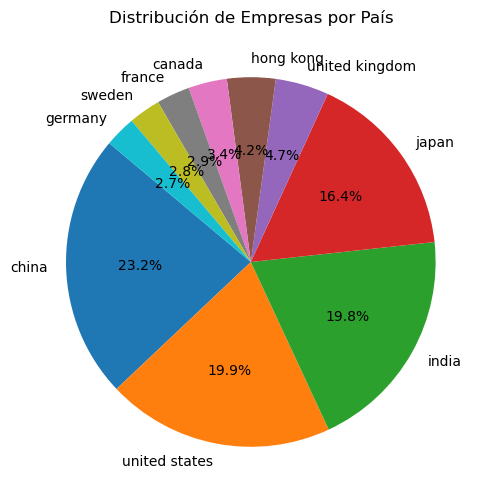

In [11]:
# Contar la cantidad de empresas por país
empresas_por_pais = dataset_API['country'].value_counts().head(10)  # Seleccionar solo los primeros 20 países

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de pastel
empresas_por_pais.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Añadir título y etiquetas
plt.title('Distribución de Empresas por País')
plt.ylabel('')

# Mostrar el gráfico
plt.show()



## Distrtibucion de tipo de industria dentro del dataset
- Tenemos a la industria con mas presencia en nuestro dataset siendo la de "banks-regional" haciendo referencia a en que este dataset se encuentran varias empresas de bancos regionales de cada region que ofrecen sus servicios bancarios no de manera nacional ni de manera internaciona, sino, de manera regional.
- Aunque no existe una tendencia marcada de una industria en especifico, la industria de "banks-regional" si presenta un numero de registros lo suficientemente altos como para marcar una diferencia visual con el segundo puesto "speciality industrial machininery" ( "banks regional" con un 18.9% de aparicion dentro del dataset y  "speciality industrial machininery" con un 13.7% ) siendo una diferencia del 5,2% solo entre el primer y segundo puesto.


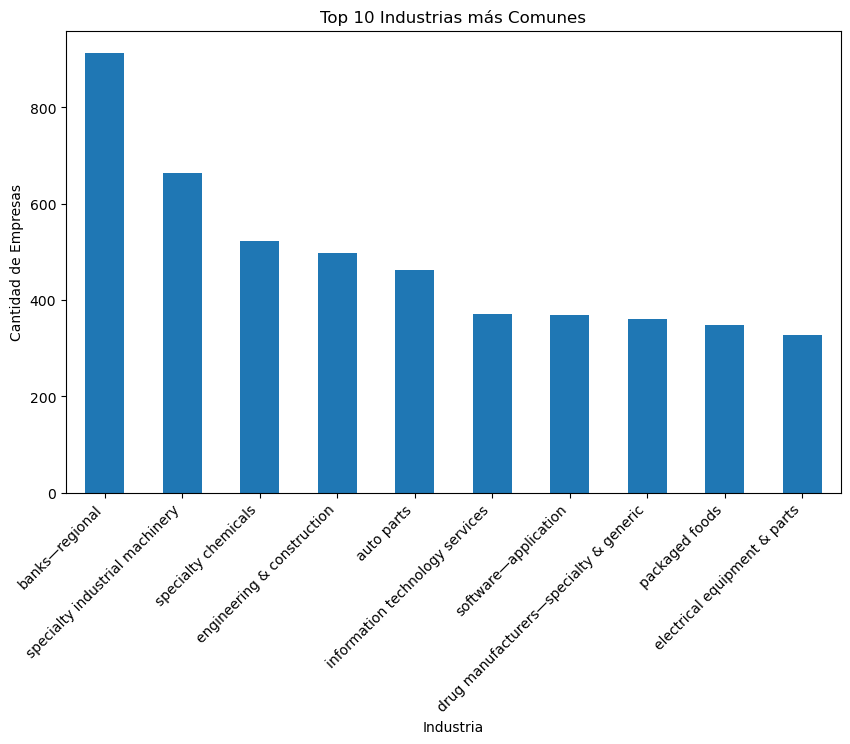

In [12]:
# Contar la cantidad de empresas por industria
empresas_por_industria = dataset_API['industry'].value_counts().head(10)  # Seleccionar solo las 10 industrias más comunes

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
empresas_por_industria.plot(kind='bar')

# Añadir título y etiquetas
plt.title('Top 10 Industrias más Comunes')
plt.xlabel('Industria')
plt.ylabel('Cantidad de Empresas')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


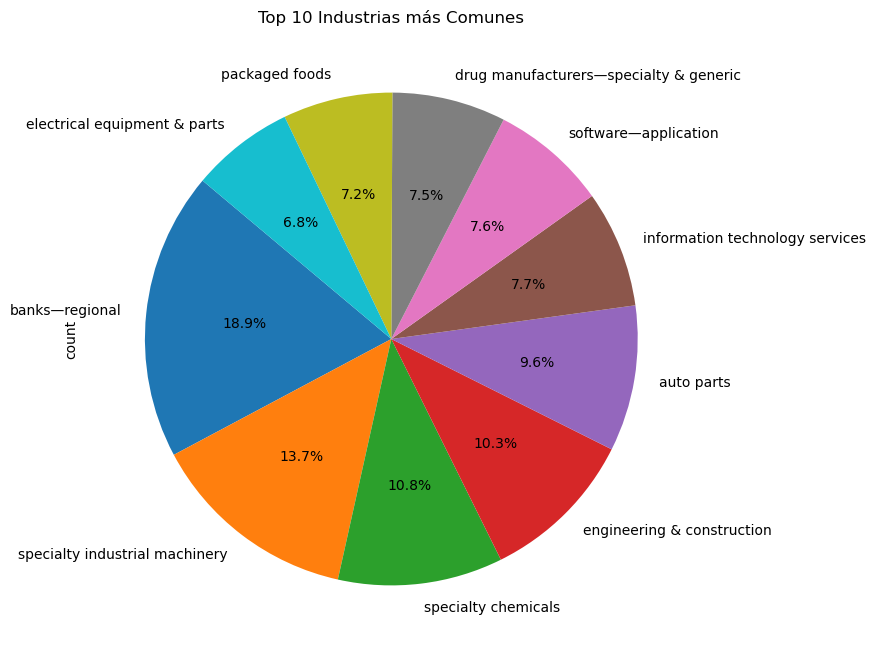

In [13]:
# Contar la cantidad de empresas por industria y seleccionar las 10 industrias más comunes
empresas_por_industria = dataset_API['industry'].value_counts().head(10)

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 8))

# Crear el gráfico de pastel
empresas_por_industria.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Top 10 Industrias más Comunes')

# Mostrar el gráfico
plt.show()


## Industrias con menos presencia dentro del dataset
- En esta grafica encontramos varias industrias que hacen referencia a subcategorias del sector de bienes raices representando sectores especificos dentro del mercado inmobiliario de inversión, cada uno con su enfoque particular en el tipo de propiedad y las operaciones comerciales asociadas.
- Las subcategorias de las que hablamos son las siguientes: "REIT-Office", "REIT-Specialty", "REIT-Healthcare Facilities" y "REIT-HOTEL-MOTEL".

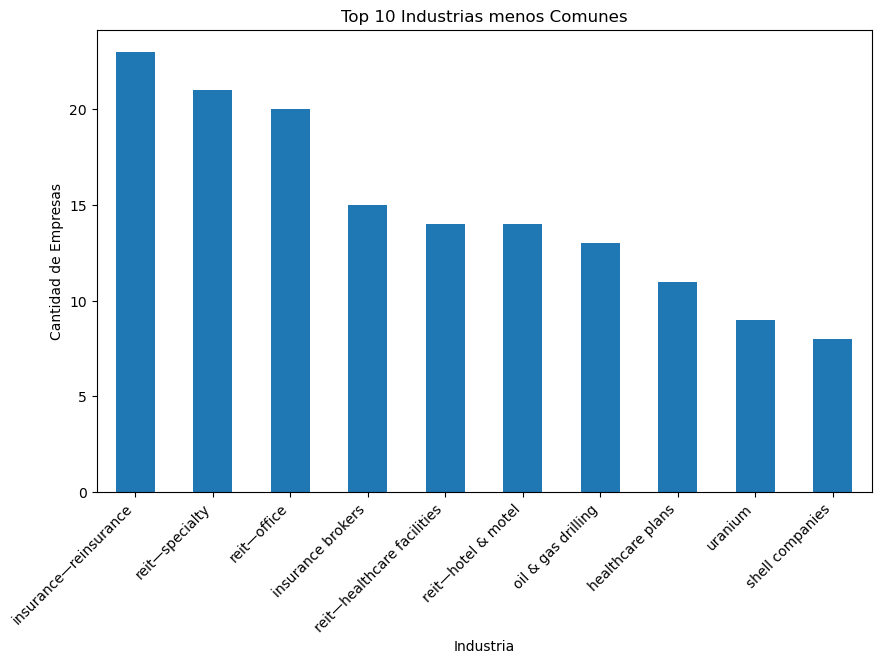

In [14]:
# Contar la cantidad de empresas por industria y seleccionar las menos comunes
empresas_por_industria_menos_comunes = dataset_API['industry'].value_counts().tail(10)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
empresas_por_industria_menos_comunes.plot(kind='bar')

# Añadir título y etiquetas
plt.title('Top 10 Industrias menos Comunes')
plt.xlabel('Industria')
plt.ylabel('Cantidad de Empresas')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


## Industrias con mayor margen de beneficio promedio dentro del dataset
- Vemos como la industria del "entertaiment" es la que mas margen de beneficio tiene en nuestro dataset, diciendonos que en prmedio las empresas de esta industria tienden a tener margenes de beneficio mas altos en comparacion con las demas industrias de nuestro dataset
- Gracias al grafico de pastel manejado en porcentajes nos podemos dar cuenta que el 58,3 del margen de beneficio de todas las industrias de nuestro dataset se lo lleva toda, solo una industria, la de "entertaiment".
- Seguida de la industria de "entertaiment" tenemos a la industria de "medical instruments and supplies" con un 11.6% y la industria de la gasolina con un 7.3%

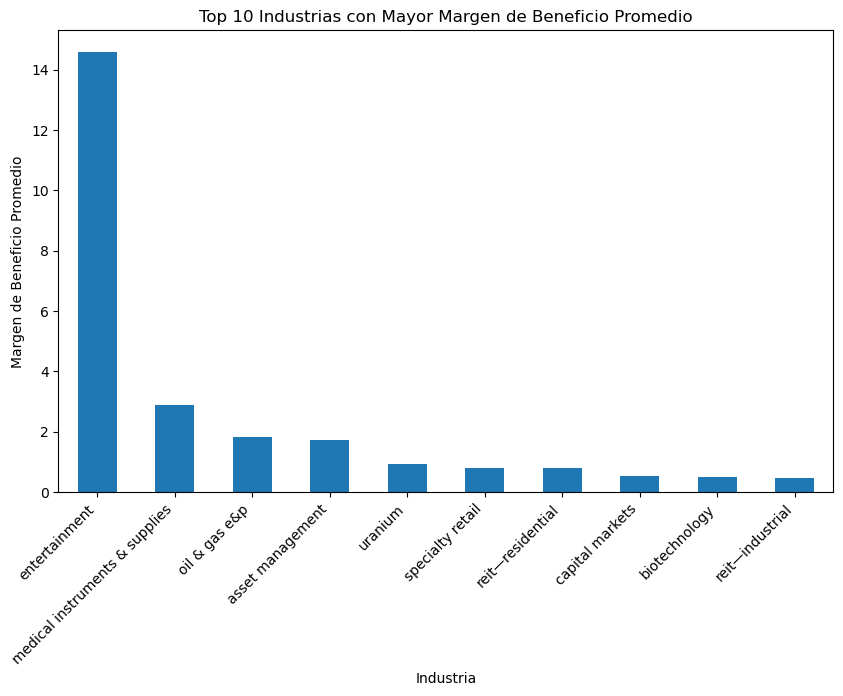

In [15]:
# Convertir la columna 'Profit Margins' a tipo numérico, ignorando los errores
dataset_API['profit margins'] = pd.to_numeric(dataset_API['profit margins'], errors='coerce')

# Calcular el margen de beneficio promedio por industria
margen_promedio_por_industria = dataset_API.groupby('industry')['profit margins'].mean().sort_values(ascending=False)

# Seleccionar las top 10 industrias con mayor margen de beneficio promedio
top_industrias = margen_promedio_por_industria.head(10)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
top_industrias.plot(kind='bar')

# Añadir título y etiquetas
plt.title('Top 10 Industrias con Mayor Margen de Beneficio Promedio')
plt.xlabel('Industria')
plt.ylabel('Margen de Beneficio Promedio')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()





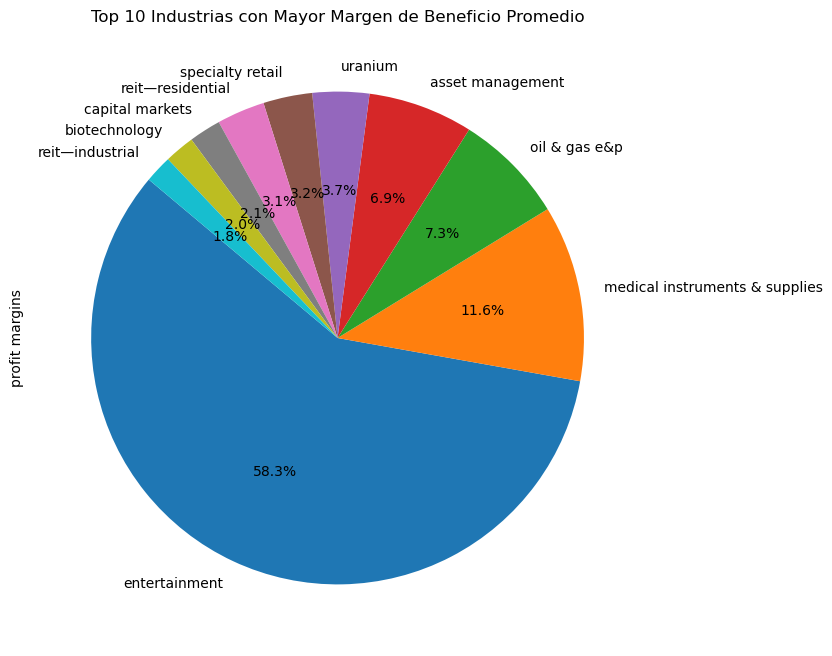

In [16]:
# Convertir la columna 'Profit Margins' a tipo numérico, ignorando los errores
dataset_API['profit margins'] = pd.to_numeric(dataset_API['profit margins'], errors='coerce')

# Calcular el margen de beneficio promedio por industria
margen_promedio_por_industria = dataset_API.groupby('industry')['profit margins'].mean().sort_values(ascending=False)

# Seleccionar las top 10 industrias con mayor margen de beneficio promedio
top_industrias = margen_promedio_por_industria.head(10)

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 8))

# Crear el gráfico de pastel
top_industrias.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Top 10 Industrias con Mayor Margen de Beneficio Promedio')

# Mostrar el gráfico
plt.show()


## Numero de empleados a tiempo completo por pais
- Vemos como "united states"se lleva el primer puesto como el pais con mas empleados a tiempo completo con una diferencia porcentual de un 13,4% con el segundo pais con mas empleados que es "china".
- No nos sorprende tanto encontrar estos paises tan arribas, siendo en el caso de "united states" y "china" paises que representa una economia gigante cada una, manejando tambien variedad de negocios y comercios internacionales.
- Tenemos a "japan" como el tercer pais con mas empleados a tiempo completo lo cual iria con lo que nos dicen varias noticias y "animes", del numero de horas laborales tan largas a las que son expuestas la poblacion japonesa.

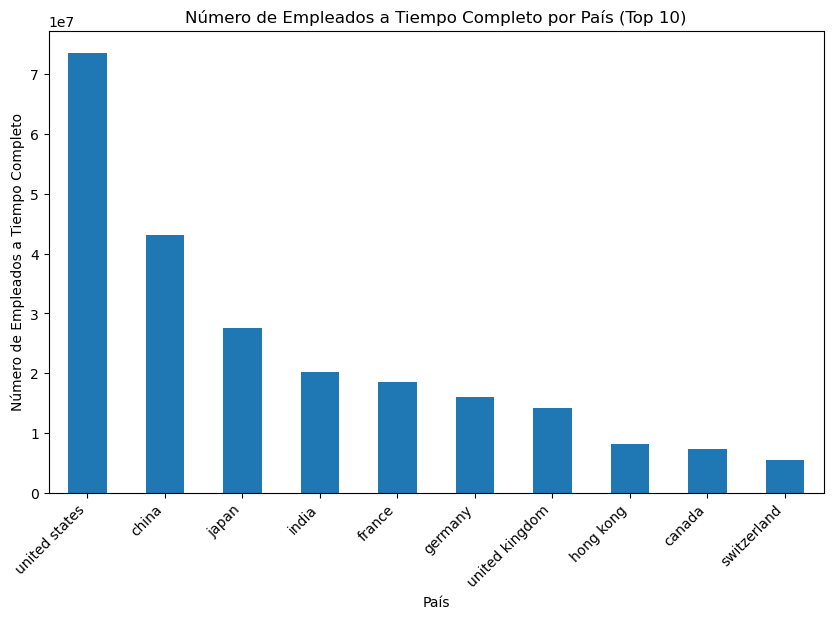

In [17]:
# Convertir la columna 'Full Time Employees' a tipo numérico, ignorando los errores
dataset_API['full time employees'] = pd.to_numeric(dataset_API['full time employees'], errors='coerce')

# Calcular la suma del número de empleados a tiempo completo por país
empleados_por_pais = dataset_API.groupby('country')['full time employees'].sum().sort_values(ascending=False).head(10)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
empleados_por_pais.plot(kind='bar')

# Añadir título y etiquetas
plt.title('Número de Empleados a Tiempo Completo por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Número de Empleados a Tiempo Completo')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


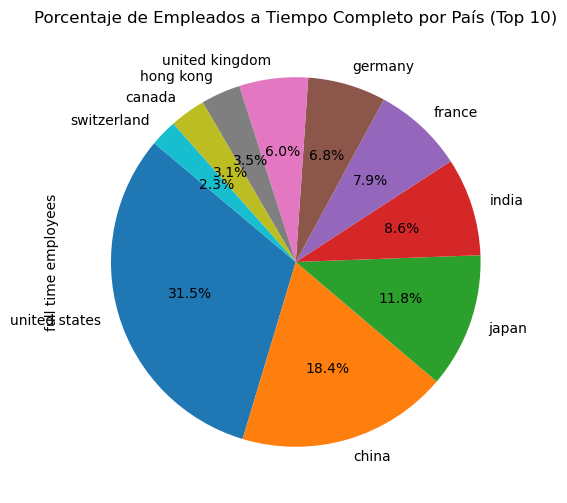

In [18]:
# Convertir la columna 'Full Time Employees' a tipo numérico, ignorando los errores
dataset_API['full time employees'] = pd.to_numeric(dataset_API['full time employees'], errors='coerce')

# Calcular la suma del número de empleados a tiempo completo por país
empleados_por_pais = dataset_API.groupby('country')['full time employees'].sum().sort_values(ascending=False).head(10)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de pastel
empleados_por_pais.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Porcentaje de Empleados a Tiempo Completo por País (Top 10)')

# Mostrar el gráfico
plt.show()



# Porcentaje de empleados a tiempo real por industria
- Tenemos a industrias que ya habiamos visto antes como las industrias con mas registros en nuestro dataset, haciendo referencia a las industrias con mas empresas en este dataset
- Estas industrias son las de "banks-regional"y "speciality industrial machinery"
- Es curioso como vemos que la industria con mas porcentaje de empleados a tiempo real por industria es la de "banks-diversified", y esto es por su amplia gama de servicios que ofrence por su gran cantidad de clientes y transaciones que ofrece a tiempo completo, esta siendo una de las razones por las que tambien vemos a la industria de "banks-regional" ya que los servicios que ofrecen estos dos son necesarios que se puedan hacer 24h para que la economia y sociedad este en movimiento.

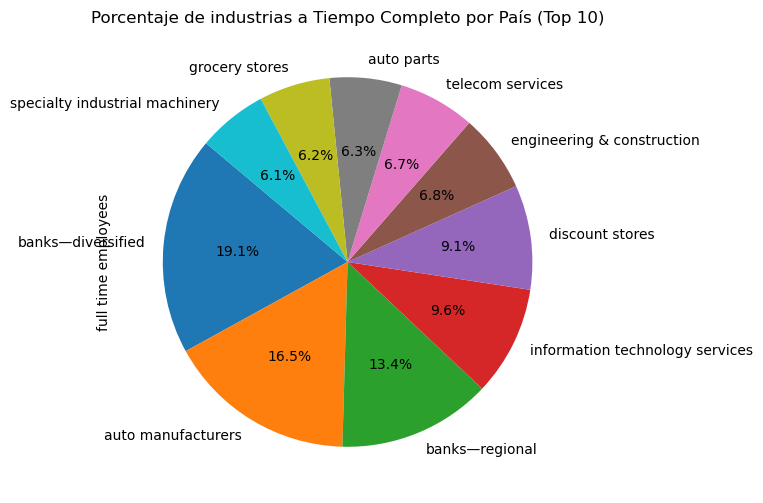

In [19]:
dataset_API['full time employees'] = pd.to_numeric(dataset_API['full time employees'], errors='coerce')
empleados_por_pais = dataset_API.groupby('industry')['full time employees'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
empleados_por_pais.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de industrias a Tiempo Completo por País (Top 10)')
plt.show()


## Panorama General de la distribucion de empleados a tiempo completo por industria
- Esta grafica nos permite ver un paronama mas global del comportamiento del numero de empleados a tiempo real por industria
- Con esta grafica podemos ver que ademas de servicios bancarios, los servicios tecnologicos y de entretimiento mantienen un volumen muy alto de empleado, por el tipo de servicio que ofrecen, uno que es muy necesario y usado en la vida cotidiana para la poblacion.

C:\Users\fedeg\AppData\Local\Temp\ipykernel_5556\2551594934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados_top_50['full time employees'] = pd.to_numeric(datos_filtrados_top_50['full time employees'], errors='coerce')


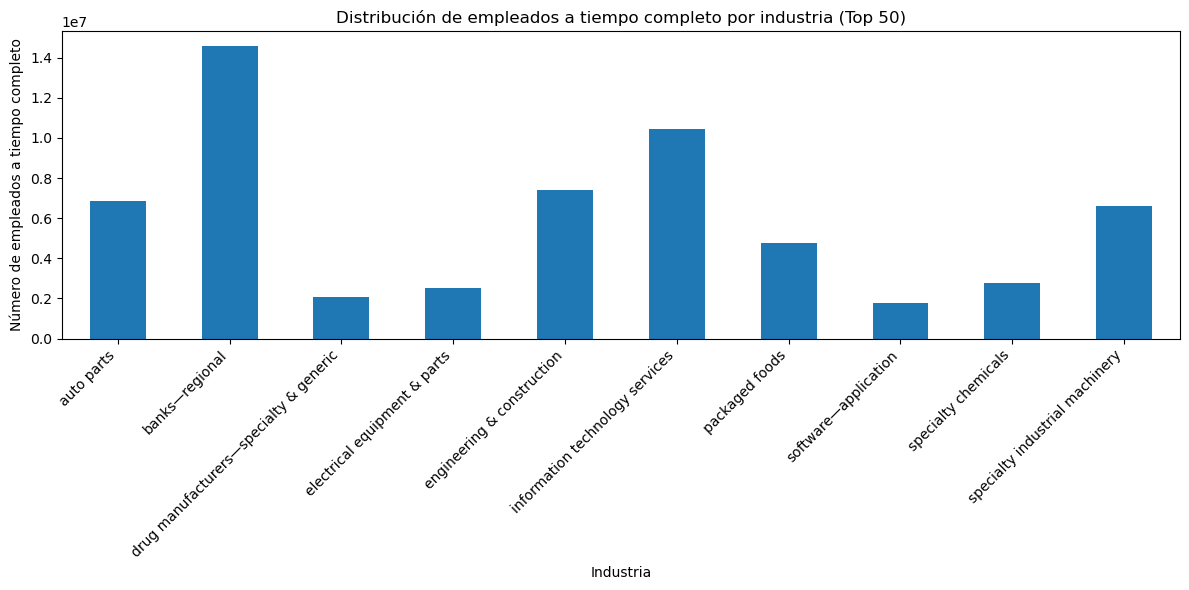

In [20]:
# Seleccionar las 50 primeras industrias más comunes
top_50_industrias = dataset_API['industry'].value_counts().head(10).index

# Filtrar los datos para incluir solo las 50 primeras industrias
datos_filtrados_top_50 = dataset_API[dataset_API['industry'].isin(top_50_industrias)]

# Convertir la columna 'Full Time Employees' a tipo numérico
datos_filtrados_top_50['full time employees'] = pd.to_numeric(datos_filtrados_top_50['full time employees'], errors='coerce')

# Agrupar los datos por industria y calcular la suma de empleados a tiempo completo
empleados_por_industria = datos_filtrados_top_50.groupby('industry')['full time employees'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
empleados_por_industria.plot(kind='bar')
plt.title('Distribución de empleados a tiempo completo por industria (Top 50)')
plt.xlabel('Industria')
plt.ylabel('Número de empleados a tiempo completo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()